# Retraining SAM for RFI Segementation

---

**Authors:** Derod Deal (dealderod@gmail.com), Preshanth Jagannathan (pjaganna@nrao.edu) | **Last Update:** September 18, 2024

**Program Version:** 1.0.0

Using the `RFITraining` class, users can train models with synthethic RFI or real data. By using `RFITraining`, you retrain the base SAM model to better detect RFI. Models can be created for a particular telescope and band as well. In this notebook, we will train a model for the VLA using P-Band visibility data.

First, import `RadioRFI` and `RFITraining`. We will first load the P-band visibility data to train the model.

In [1]:
import sys
sys.path.append('../')

In [2]:
from samrfi import RadioRFI, RFITraining 

ms_path = '/home/gpuhost001/ddeal/RFI-AI/one_antenna_3C219_sqrt.ms'
dir_path = '/home/gpuhost001/ddeal/RFI-AI/'

datarfi = RadioRFI(vis=ms_path, dir_path=dir_path)
datarfi.load(mode='DATA', ant_i=1)

/home/gpuhost001/ddeal/miniconda3/envs/rfi-ai-gpuhost001/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1/1 [00:17<00:00, 17.10s/it]


(26, 4, 2048, 511)


Here we loaded 104 baselines (26 baselines $\times$ 4 polarizations) from a shortened 3C219 measurement set as a numpy array. To train our model using RFI from our loaded P-band data, simply initiate a `RFITraining` instance and use `RFITraining.train`. You will need to define a device for the model to train on. We recommend that you train your model on a NVIDIA GPU by using `device='cuda'`.

Applying SQRT stretch to 19968 patches...


  2%|▏         | 336/19968 [00:00<00:05, 3359.28it/s]/home/gpuhost001/ddeal/RFI-AI/SAM-RFI/notebooks/../samrfi/rfitraining.py:55: RuntimeWarning: divide by zero encountered in divide
  data = data/np.median(data)
/home/gpuhost001/ddeal/RFI-AI/SAM-RFI/notebooks/../samrfi/rfitraining.py:55: RuntimeWarning: invalid value encountered in divide
  data = data/np.median(data)
100%|██████████| 19968/19968 [00:06<00:00, 3198.44it/s]


Creating sigma 5 flags for each data patch...


100%|██████████| 19968/19968 [00:17<00:00, 1135.09it/s]


(18925, 128, 128) (18925, 128, 128)
Training model...


100%|██████████| 13/13 [00:51<00:00,  3.95s/it]


EPOCH: 0
Mean loss: 2.1194880375495324


100%|██████████| 13/13 [00:52<00:00,  4.03s/it]


EPOCH: 1
Mean loss: 1.3457609231655414


100%|██████████| 13/13 [00:53<00:00,  4.11s/it]


EPOCH: 2
Mean loss: 0.9462755780953628


100%|██████████| 13/13 [00:54<00:00,  4.18s/it]


EPOCH: 3
Mean loss: 0.8356081614127526


100%|██████████| 13/13 [00:54<00:00,  4.18s/it]


EPOCH: 4
Mean loss: 0.7945608084018414


<Figure size 640x480 with 0 Axes>

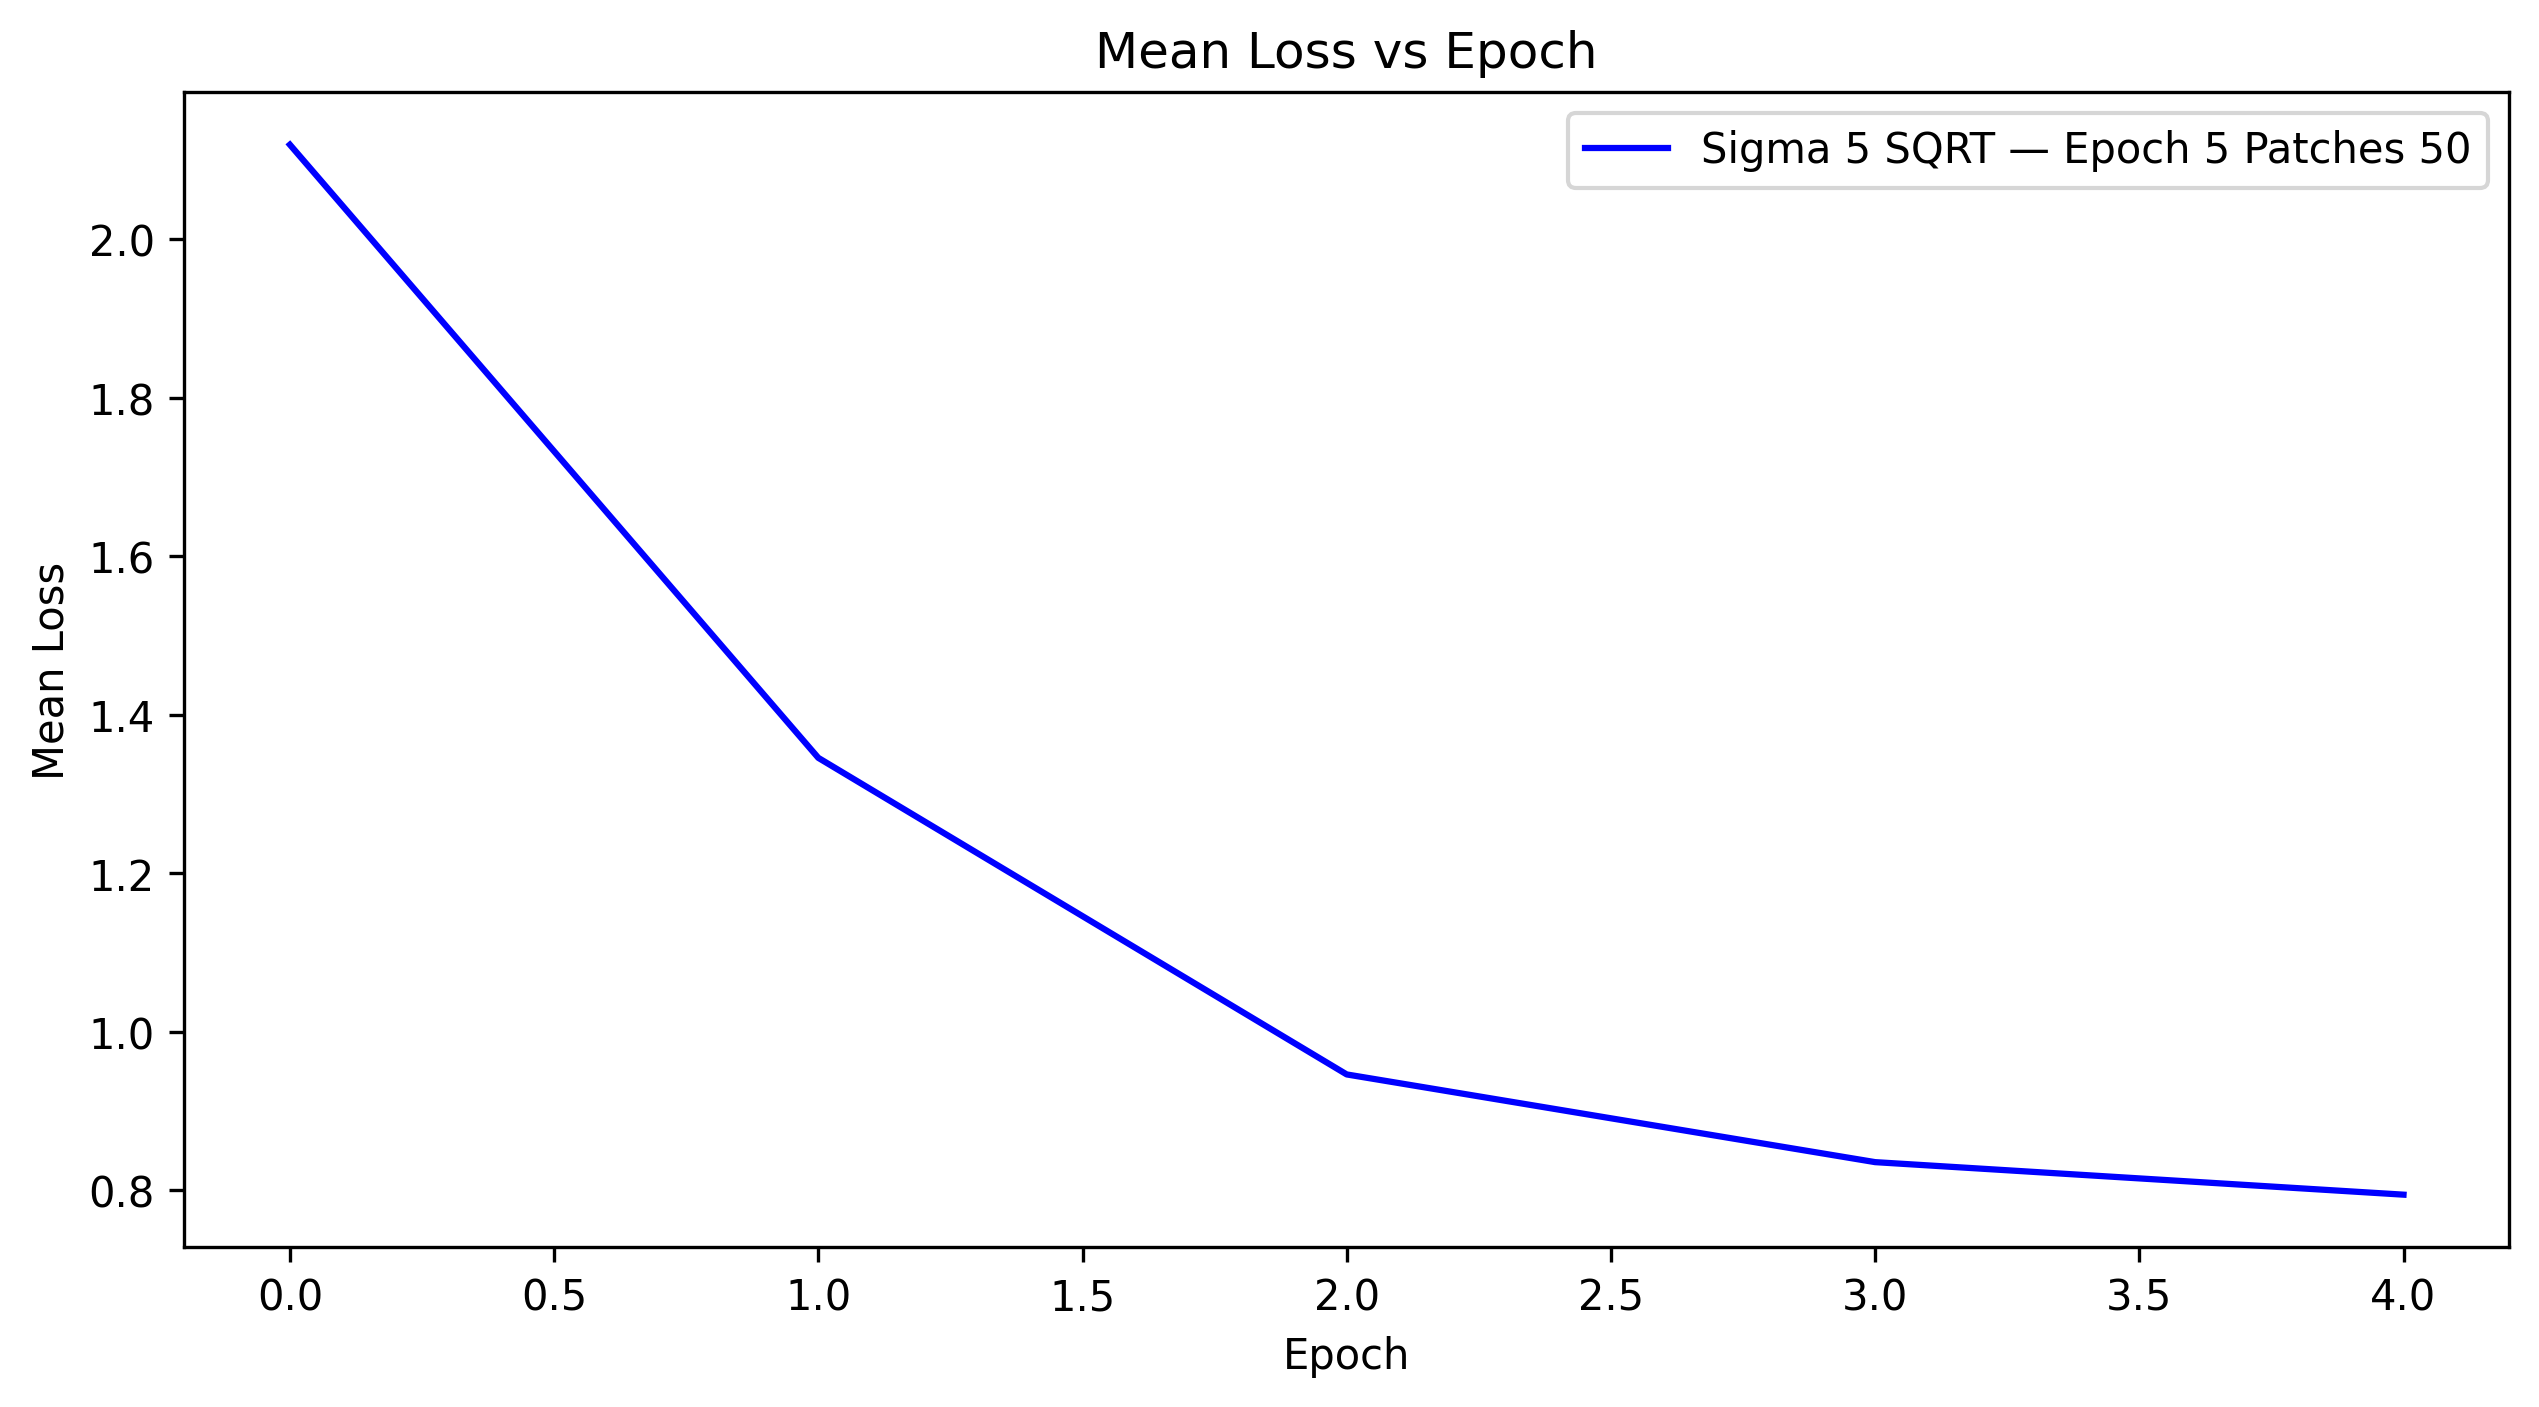

In [3]:
new_model = RFITraining(datarfi, device='cuda')
new_model.train(num_epochs=5, stretch='SQRT', num_patches=50)